Numpy의 빠른 정렬

np.sort ; 바로 배열의 정렬 버전을 리턴한다
np.argsort ; 정렬된 요소의 인덱스를 리턴한다

In [1]:
import numpy as np

x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [2]:
x.sort()
x

array([1, 2, 3, 4, 5])

In [3]:
x = np.array([2,1,4,3,5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [4]:
x = np.array([2,1,4,3,5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4], dtype=int64)

In [5]:
x[i] # 팬시 인덱싱을 통한 정렬

array([1, 2, 3, 4, 5])

행이나 열 기준으로 정렬하기

axis인수를 사용해 다차원 배열의 특정 행이나 열에 따라 정렬 가능

In [6]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4,6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [7]:
# X의 각 열을 정렬
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [8]:
# X의 각 행을 정렬
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

부분 정렬: 파티션 나누기 np.partition 함수==> k개의 가장 작은 값이 먼저 임의로 나열되고 오른쪽에는 나머지가 임의의 순서로 채워짐

Signature: np.partition(a, kth, axis=-1, kind='introselect', order=None)
Docstring:
Return a partitioned copy of an array.

Creates a copy of the array with its elements rearranged in such a
way that the value of the element in k-th position is in the
position it would be in a sorted array. All elements smaller than
the k-th element are moved before this element and all equal or
greater are moved behind it. The ordering of the elements in the two
partitions is undefined.

.. versionadded:: 1.8.0

Parameters
----------
a : array_like
    Array to be sorted.
kth : int or sequence of ints
    Element index to partition by. The k-th value of the element
    will be in its final sorted position and all smaller elements
    will be moved before it and all equal or greater elements behind
    it. The order all elements in the partitions is undefined. If
    provided with a sequence of k-th it will partition all elements
    indexed by k-th  of them into their sorted position at once.
axis : int or None, optional
    Axis along which to sort. If None, the array is flattened before
    sorting. The default is -1, which sorts along the last axis.
kind : {'introselect'}, optional
    Selection algorithm. Default is 'introselect'.
order : str or list of str, optional
    When `a` is an array with fields defined, this argument
    specifies which fields to compare first, second, etc.  A single
    field can be specified as a string.  Not all fields need be
    specified, but unspecified fields will still be used, in the
    order in which they come up in the dtype, to break ties.

Returns
-------
partitioned_array : ndarray
    Array of the same type and shape as `a`.

See Also
--------
ndarray.partition : Method to sort an array in-place.
argpartition : Indirect partition.
sort : Full sorting

Notes
-----
The various selection algorithms are characterized by their average
speed, worst case performance, work space size, and whether they are
stable. A stable sort keeps items with the same key in the same
relative order. The available algorithms have the following
properties:

================= ======= ============= ============ =======
   kind            speed   worst case    work space  stable
================= ======= ============= ============ =======
'introselect'        1        O(n)           0         no
================= ======= ============= ============ =======

All the partition algorithms make temporary copies of the data when
partitioning along any but the last axis.  Consequently,
partitioning along the last axis is faster and uses less space than
partitioning along any other axis.

The sort order for complex numbers is lexicographic. If both the
real and imaginary parts are non-nan then the order is determined by
the real parts except when they are equal, in which case the order
is determined by the imaginary parts.

Examples
--------
>>> a = np.array([3, 4, 2, 1])
>>> np.partition(a, 3)
array([2, 1, 3, 4])

>>> np.partition(a, (1, 3))
array([1, 2, 3, 4])
File:      c:\users\jsong\anaconda3\lib\site-packages\numpy\core\fromnumeric.py
Type:      function

In [9]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [10]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x, 5)

array([2, 1, 3, 4, 5, 6, 7])

In [11]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x, 1)

array([1, 2, 3, 7, 6, 5, 4])

In [12]:
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [13]:
np.partition(X, 4, axis=1)

array([[6, 6, 3, 4, 7, 9],
       [3, 2, 6, 4, 7, 7],
       [1, 5, 2, 4, 7, 7],
       [0, 4, 1, 5, 5, 9]])

In [14]:
np.partition(X, 3, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [2, 1, 4, 5, 7, 7],
       [0, 4, 1, 5, 9, 5]])

예제: 최근접 이웃 알고리즘

집합에서 각 점의 가장 가까운 이웃들을 찾기 위해서 여러 축을 따라 argsort 함수를 어떻게 사용하는지 알아 보자


In [15]:
X = rand.rand(10,2)
X

array([[ 0.00706631,  0.02306243],
       [ 0.52477466,  0.39986097],
       [ 0.04666566,  0.97375552],
       [ 0.23277134,  0.09060643],
       [ 0.61838601,  0.38246199],
       [ 0.98323089,  0.46676289],
       [ 0.85994041,  0.68030754],
       [ 0.45049925,  0.01326496],
       [ 0.94220176,  0.56328822],
       [ 0.3854165 ,  0.01596625]])

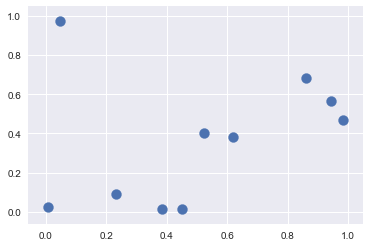

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1], s=100);

In [23]:
difference = X[:, np.newaxis,:] - X[np.newaxis,:,:]
difference

array([[[ 0.        ,  0.        ],
        [-0.51770836, -0.37679855],
        [-0.03959936, -0.95069309],
        [-0.22570504, -0.06754401],
        [-0.6113197 , -0.35939957],
        [-0.97616458, -0.44370047],
        [-0.8528741 , -0.65724511],
        [-0.44343295,  0.00979746],
        [-0.93513545, -0.54022579],
        [-0.3783502 ,  0.00709617]],

       [[ 0.51770836,  0.37679855],
        [ 0.        ,  0.        ],
        [ 0.478109  , -0.57389455],
        [ 0.29200332,  0.30925454],
        [-0.09361135,  0.01739898],
        [-0.45845623, -0.06690192],
        [-0.33516575, -0.28044657],
        [ 0.07427541,  0.38659601],
        [-0.4174271 , -0.16342725],
        [ 0.13935816,  0.38389472]],

       [[ 0.03959936,  0.95069309],
        [-0.478109  ,  0.57389455],
        [ 0.        ,  0.        ],
        [-0.18610568,  0.88314908],
        [-0.57172035,  0.59129353],
        [-0.93656522,  0.50699263],
        [-0.81327474,  0.29344798],
        [-0.40383359,  0

In [22]:
dist_sq = np.sum((X[:, np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)
dist_sq

array([[ 0.        ,  0.40999909,  0.90538547,  0.05550496,  0.50287983,
         1.14976739,  1.15936537,  0.19672877,  1.16632222,  0.14319923],
       [ 0.40999909,  0.        ,  0.55794316,  0.18090431,  0.00906581,
         0.21465798,  0.19098635,  0.15497331,  0.20095384,  0.16679585],
       [ 0.90538547,  0.55794316,  0.        ,  0.81458763,  0.67649219,
         1.13419594,  0.74752753,  1.08562368,  0.9704683 ,  1.03211241],
       [ 0.05550496,  0.18090431,  0.81458763,  0.        ,  0.23387834,
         0.70468321,  0.74108843,  0.05338715,  0.72671958,  0.0288717 ],
       [ 0.50287983,  0.00906581,  0.67649219,  0.23387834,  0.        ,
         0.14021843,  0.1470605 ,  0.16449241,  0.13755476,  0.18859392],
       [ 1.14976739,  0.21465798,  1.13419594,  0.70468321,  0.14021843,
         0.        ,  0.06080186,  0.48946337,  0.01100053,  0.56059965],
       [ 1.15936537,  0.19098635,  0.74752753,  0.74108843,  0.1470605 ,
         0.06080186,  0.        ,  0.61258786

In [18]:
dist_sq.diagonal() # 행렬의 대각선의 합이 0인지 확인

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

제곱 거리를 기준으로 np.argsort를 활용하여 정렬된 인덱스를 행별로 정리해 보자

In [19]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]], dtype=int64)

첫번째 열은 0부터 9까지 순서대로 나타난다. 각 점의 가장 가까운 이웃은 바로 자기 자신임

In [20]:
# 가장 가까운 K 이웃을 구하기만 하면 된다면 각행을 파티션으로 나누어 가장 작은 K+1 개의 제곱거리가
# 먼저 오고 그보다 큰 요소는 나머지에 위치 시키면 됨
K=2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

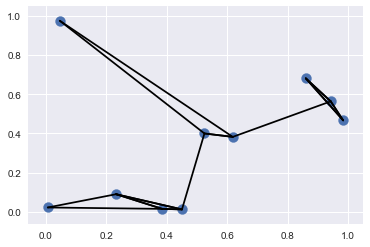

In [21]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# 각 점을 두개의 가장 가까운 이웃과 선으로 연결

K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')